<a href="https://colab.research.google.com/github/somendrew/Machine_Learning_Concepts/blob/main/t_SNE_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [3]:
data = datasets.fetch_openml(
    'mnist_784',
    version = 1,
    return_X_y = True
)
pixel_values, targets = data
targets  = targets.astype(int)

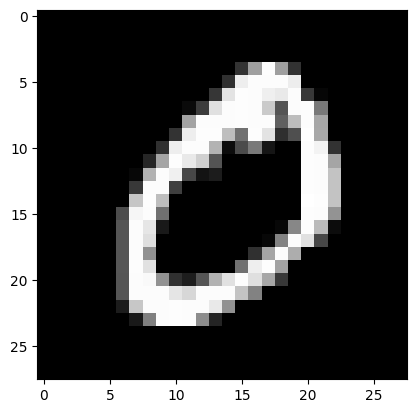

In [6]:
single_image = pixel_values.iloc[1,:].values.reshape(28,28)

plt.imshow(single_image,cmap = 'gray')

In [8]:
tsne = manifold.TSNE(n_components = 2, random_state = 42)

transformed_data = tsne.fit_transform(pixel_values.iloc[:3000,:])

In [9]:
transformed_data

array([[ 18.051811 ,  -8.087164 ],
       [ 55.221912 ,  -2.5787654],
       [  1.2590144, -52.734043 ],
       ...,
       [-29.38894  , -13.31057  ],
       [-26.865181 ,  40.77223  ],
       [ 13.11595  , -23.377043 ]], dtype=float32)

In [10]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data,targets[:3000])),
    columns = ['x','y','targets']
)
tsne_df.loc[:,'targets'] = tsne_df.targets.astype(int)

In [11]:
tsne_df

,x,y,targets
0,18.051811,-8.087164,5.0
1,55.221912,-2.578765,0.0
2,1.259014,-52.734043,4.0
3,-42.778206,8.782717,1.0
4,-8.499600,-31.338474,9.0
...,...,...,...
2995,-33.421638,-25.034252,7.0
2996,49.829678,-5.057864,0.0
2997,-29.388941,-13.310570,9.0
2998,-26.865181,40.772228,1.0


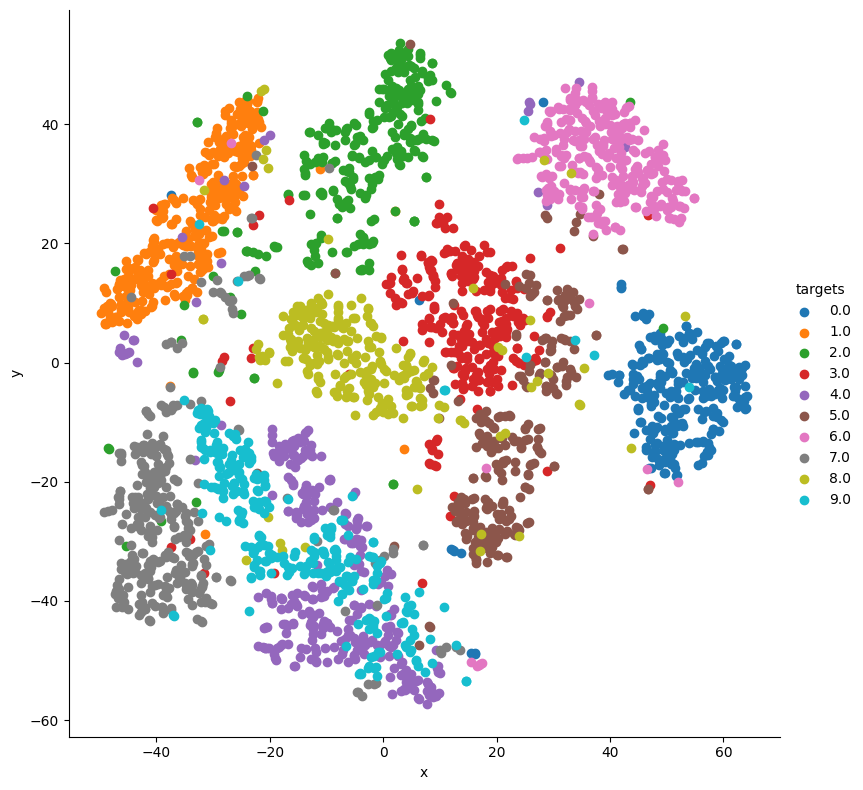

In [13]:
grid = sns.FacetGrid(tsne_df,hue='targets',height = 8)
grid.map(plt.scatter,'x','y').add_legend()